In [84]:
import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [97]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [98]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [99]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [100]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)# performing one hot encoding

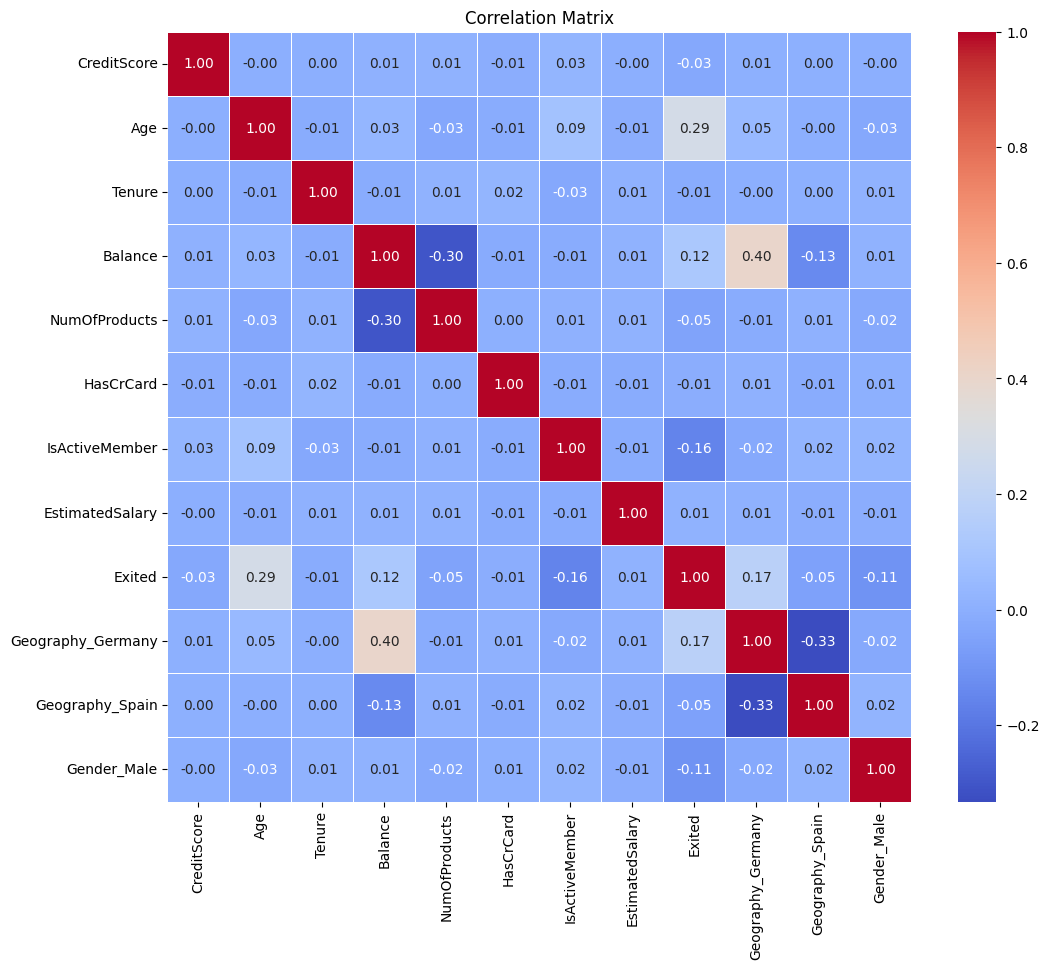

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout
import pandas as pd
import numpy as np



# Separate features and target
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)


y_train = y_train.astype(np.int64)





In [108]:
num_features = X_train_scaled_df.shape[1]
print(num_features)

11


In [109]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
model1=Sequential()
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

model1.add(Dense(128,activation='relu',input_dim=num_features ,kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dropout(0.4))
model1.add(Dense(32,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))


#adam=Adam(learning_rate=0.01)
model1.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy'])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
history=model.fit(X_train_scaled_df, y_train, epochs=300 ,validation_data=(X_test_scaled_df, y_test),callbacks=[early_stopping])

Epoch 1/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8761 - loss: 0.2902 - val_accuracy: 0.8625 - val_loss: 0.3420
Epoch 2/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 0.2862 - val_accuracy: 0.8565 - val_loss: 0.3440
Epoch 3/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8748 - loss: 0.2883 - val_accuracy: 0.8610 - val_loss: 0.3463
Epoch 4/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8782 - loss: 0.2911 - val_accuracy: 0.8630 - val_loss: 0.3470
Epoch 5/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8727 - loss: 0.2910 - val_accuracy: 0.8640 - val_loss: 0.3431


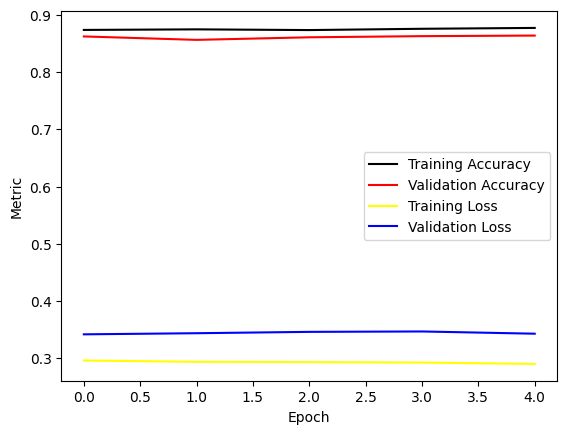

In [111]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'], color='black', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.plot(history.history['loss'], color='yellow', label='Training Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

In [112]:

y_pred = model.predict(X_test_scaled_df)

y_pred_classes = (y_pred > 0.5).astype(int)



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [113]:
from sklearn.metrics import accuracy_score

# Assuming y_pred_classes and y_test are numpy arrays
accuracy = accuracy_score(y_test, y_pred_classes)
print("Accuracy:", accuracy)


Accuracy: 0.8625
